# ***Quantum Image Teleportation Protocol along with Huffman Compression and Decompression***
* Extract the Pixels of the input image and store modified pixels in a text file.
* Compressing the actual input text file and converting it into binary and stored in ".bin" file.
* Passing Binary values to the Quantum Teleportation circuit.
* After successful Teleportation, recreate .bin file for decompression.
* Decompressing into actual text file.
* Re-construct the pixels from teleported file.
* Save and display the Image.

In [ ]:
# importing required libraries
from PIL import Image
import numpy as np
import matplotlib.pyplot as plt
import cv2
import numpy
from qiskit import QuantumRegister, ClassicalRegister, QuantumCircuit, Aer, execute

In [ ]:
img_name = input('Enter the Name of the file with extension : ')
# reading image file 
img = cv2.imread(img_name)

# # Convert BGR to RGB to print or get original image with original colors
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

Enter the Name of the file with extension : circle.png


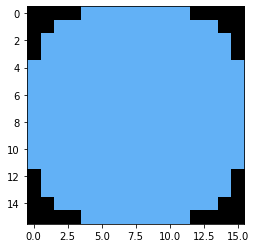

In [ ]:
  # Plotting image
plt.imshow(img)

In [ ]:
# Printing the pixel values using ndimension array
arr = np.array(img)
print('Pixel values from Top To Bottom ---> ', len(arr))
print('Pixel values from Left To Right ---> ', len(arr[0]))

Pixel values from Top To Bottom --->  16
Pixel values from Left To Right --->  16


In [ ]:
  # Printing numpy array having pixels values.
# print(type(arr))
# print(arr)
print(type(arr[6][15][2]))

<class 'numpy.uint8'>


In [ ]:
import heapq
import os
import time


def image_to_text(arr, name):
    output_path = name + '_pixel' + '.txt'
    text = ''
    with open(output_path,'w') as output:
        for i in range(len(arr)):
            for j in range(len(arr[0])):
                a = ''
                for k in range(3):
                    if k != 2:
                        a += str(arr[i][j][k]) + '!'
                    else:
                        a += str(arr[i][j][k]) + '#'
                output.write(a)
    print('Step 1 : Image to Text Completed\n')

class BinaryTree:
    def __init__(self,value,frequ):
        self.value = value
        self.frequ = frequ
        self.left = None
        self.right = None
        
    def __lt__(self,other):
        return self.frequ < other.frequ
    
    def __eq__(self,other):
        return self.frequ == other.frequ        

class Huffmancode:
    
    def __init__(self,path):
        self.path = path
        self.__heap = []
        self.__code = {}
        self.__reversecode = {}
        
    def __frequency_from_text(self,text):
        frequ_dict = {}
        for char in text:
            if char not in frequ_dict:
                frequ_dict[char] = 0
            frequ_dict[char] +=1
        return frequ_dict    
    
    def __Build_heap(self,frequency_dict):
        for key in frequency_dict:
            frequency = frequency_dict[key]
            binary_tree_node = BinaryTree(key,frequency)
            heapq.heappush(self.__heap , binary_tree_node)
    
    def __Build_Binary_Tree(self):
        while len(self.__heap) > 1:
            binary_tree_node_1 = heapq.heappop(self.__heap)
            binary_tree_node_2 = heapq.heappop(self.__heap)
            sum_of_freq = binary_tree_node_1.frequ + binary_tree_node_2.frequ
            newnode = BinaryTree(None,sum_of_freq)
            newnode.left = binary_tree_node_1
            newnode.right = binary_tree_node_2
            heapq.heappush(self.__heap,newnode)
        return
    def __Build_Tree_Code_Helper(self,root,curr_bits):
        if root is None:
            return
        if root.value is not None:
            self.__code[root.value] = curr_bits
            self.__reversecode[curr_bits] = root.value
            return
        self.__Build_Tree_Code_Helper(root.left,curr_bits+'0')
        self.__Build_Tree_Code_Helper(root.right,curr_bits+'1')
    
    def __Build_Tree_Code(self):
        root = heapq.heappop(self.__heap)
        self.__Build_Tree_Code_Helper(root,'')
        

    def __Build_Encoded_Text(self,text):
        encoded_text = ''
        for char in text:
            encoded_text += self.__code[char]
            
        return encoded_text  
    
    
    def __Build_Padded_Text(self,encoded_text):
        padding_value = 8 - (len(encoded_text) % 8)
        for i in range(padding_value):
            encoded_text += '0'
            
        padded_info = "{0:08b}".format(padding_value)
        padded_encoded_text = padded_info + encoded_text
        return padded_encoded_text
    
    def __Build_Byte_Array(self, padded_text):
        array = []
        for i in range(0,len(padded_text) , 8):
            byte = padded_text[i:i+8]
            array.append(int(byte,2))
        return array    
    
    def compression(self, name):
        
        #To access the file and extract text from that file.
        filename,file_extension = os.path.splitext(self.path)
        output_path = name + '.bin'
        with open (self.path,'r+') as file , open(output_path,'wb') as output:
            text = file.read()
            
            frequency_dict = self.__frequency_from_text(text)
            print('Step 2 : \n\tfrequency_dict............' + '... Completed !') # ---------
            #Calculate frequency of each text and store it in freq. dictionary
    
            build_heap = self.__Build_heap(frequency_dict)
            print('\tbuild_heap................' + '... Completed !') # ---------
            # Min heap for two minimum frquency.

            #Construct binary tree from Heap .

            self.__Build_Binary_Tree()
            print('\tself.__Build_Binary_Tree()' + '... Completed !') # ---------
            #construct code from binary tree and stored it in dictionary.

            self.__Build_Tree_Code()
            print('\tself.__Build_Tree_Code()..' + '... Completed !') # ---------
            #Construct encoded text.

            encoded_text = self.__Build_Encoded_Text(text)
            print('\tencoded_text..............' + '... Completed !') # ---------
            #padding of text

            padded_text = self.__Build_Padded_Text(encoded_text)
            print('\tpadded_text...............' + '... Completed !') # ---------
            #We have to return that binary file as an output.

            bytes_array = self.__Build_Byte_Array(padded_text)
            print('\tbytes_array...............' + '... Completed !') # ---------

            final_bytes = bytes(bytes_array)
            output.write(final_bytes)
        print("Successfully Compressed and created a '.bin' file\n")
        return output_path

    def getting_binary_values(self, input_path):
        filename,file_extension = os.path.splitext(input_path)
        with open(input_path,'rb') as file:
            bit_string = ''
            text = file.read()
            l = []
            for e in text:
                l.append(e) # output will be like [24, 25]
            for each in l:
                v1 = bin(each)
                v1 = v1[2:]
                v2 = v1[::-1]
                if len(v2) != 8:
                    v3 = v2 + ('0'* (8-len(v2)))
                    v3 = v3[::-1]
                    bit_string += v3
                else:
                    bit_string += v1
        return(bit_string)
    
    def QFTP(self, binary_list):

        ''' aD --- represents --- Alice Data Qubit
            aQ --- represents --- Alice Qubit
            bQ --- represents --- Bob Data Qubit '''

        # Time starts
        c_start = time.time()

        print('\nStep 4 : \n\tTeleportation started...')
        count = 0
        counts_list = []
        t = 0
        for each in binary_list:
            single_char = each 
            n = len(single_char)

            Alice_data = QuantumRegister(n, 'aD')
            Alice_qubit = QuantumRegister(n, 'aQ')
            Bob_qubit = QuantumRegister(n, 'bQ')
            cr = ClassicalRegister(n*3, 'c')
            circuit = QuantumCircuit(Alice_data, Alice_qubit, Bob_qubit, cr)

            i = 0
            for each in single_char:
                if(each == '1'):
                    circuit.x(Alice_data[int(i)])
                i += 1
            circuit.barrier()


            for i in range(n):
                circuit.h(Alice_qubit[i])
                circuit.cx(Alice_qubit[i], Bob_qubit[i])
            circuit.barrier()


            for i in range(n):
                circuit.cx(Alice_data[n-1-i], Alice_qubit[n-1-i])
                circuit.h(Alice_data[n-1-i])
            circuit.barrier()


            for i in range(n):
                circuit.measure(Alice_data[i], cr[i])

            for i in range(n):
                circuit.measure(Alice_qubit[i], cr[i])
            circuit.barrier()


            for i in range(n):
                circuit.cx(Alice_qubit[i], Bob_qubit[i])
                circuit.cz(Alice_data[i], Bob_qubit[i])
            circuit.barrier()


            for i in range(n):
                circuit.measure(Bob_qubit[i], cr[i])

            # circuit.draw(output = 'mpl')

            ''' Getting counts from backend '''
            simulator_backend = Aer.get_backend('qasm_simulator')
            result = execute(circuit, simulator_backend, shots = 1).result()
            counts = result.get_counts()


            for key in counts:
                key_var = key
                a = key_var[len(key_var)-n:]
                b = ''
                for i in range(len(a)):
                    b = b + a[(-i-1)]
                counts_list.append(b)

            t += 1
            print(f'\rOut of |{len(binary_list)}| Iterartions, |{t}| Iterations completed', end="")


        c_end = time.time()
        print(f"\nRuntime of the Circuit is |{c_end - c_start}| Seconds")


        print('\nProcess completed !')
        print('Hurray!😊 you have successfully Teleporated entire File using Quantum Teleportation.\n')
        return counts_list
    
    
    def __Remove_Padding(self,text):
        padded_info = text[:8]
        extra_padding = int(padded_info,2)
        text = text[8:]
        padding_removed_text = text[:-1*extra_padding]
        return padding_removed_text
        
    def __Decompress_Text(self,text):    
        decoded_text = ''
        current_bits = ''
        for bit in text:
            current_bits += bit
            if current_bits in self.__reversecode:
                character = self.__reversecode[current_bits]
                decoded_text += character
                current_bits = ""
        return decoded_text
    
    
    def decompress(self,input_path, name):
        filename,file_extension = os.path.splitext(input_path)
        output_path = name + '_decompressed' + '.txt'
        with open(input_path,'rb') as file , open(output_path,'w') as output:
            bit_string = ''
            byte = file.read(1)
            while byte:
                byte = ord(byte)
                bits = bin(byte)[2:].rjust(8,'0')
                bit_string += bits
                byte = file.read(1)
                
            actual_text = self.__Remove_Padding(bit_string)    
            decompressed_text = self.__Decompress_Text(actual_text)
            output.write(decompressed_text)
        print("\nStep 3 : Successfully Decompressed '.bin' file and created original file\n")
        return output_path
        

class text_to_numpy_array:
    
    def __init__(self, path):
        self.final_path = path
        
    def reading_text_image(self):
        filename,file_extension = os.path.splitext(self.final_path)
        with open (self.final_path,'r+') as file:
            text = file.read()
        input_string = text#1
        symbol1 = '!' #2
        symbol2 = '#'
        replace_symbol1 = ' ' #3
        replace_symbol2 = ' '
        modified_str = input_string.replace(symbol1,replace_symbol1) #4
        modified_text = modified_str.replace(symbol2,replace_symbol2)

        lis = modified_text.split()
        for i in range(0, len(lis)):
            lis[i] = int(lis[i])

        val = 0
        col = []
        for i in range(len(arr)):
            row = []
            for j in range(len(arr[0])):
                l = []
                l = lis[val : val+3]
                val = val + 3
                row.append(l)
            col.append(row)

        ar = numpy.array(col)
        print("Step 4 : Your Image is Ready. Please check your image")
        return ar

Step 1 : Image to Text Completed

Step 2 : 
	frequency_dict............... Completed !
	build_heap................... Completed !
	self.__Build_Binary_Tree()... Completed !
	self.__Build_Tree_Code()..... Completed !
	encoded_text................. Completed !
	padded_text.................. Completed !
	bytes_array.................. Completed !
Successfully Compressed and created a '.bin' file

 

Number of Iterations without Hiffman including additional Characters :  12288

Number of Iterations with Huufam including additional Characters :  1086



Step 4 : 
	Teleportation started...
Out of |1086| Iterartions, |1086| Iterations completed
Runtime of the Circuit is |70.02736401557922| Seconds

Process completed !
Hurray!😊 you have successfully Teleporated entire File using Quantum Teleportation.


Step 3 : Successfully Decompressed '.bin' file and created original file

Step 4 : Your Image is Ready. Please check your image

Runtime of the Program is |70.07938146591187| Seconds


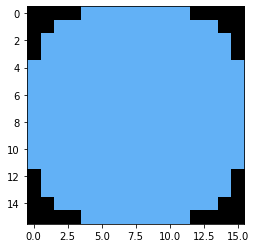

In [ ]:
split_string = img_name.split(".")
name = split_string[0]


# Time starts
start = time.time()


image_to_text(arr, name)
path = name + '_pixel.txt'


# ------------------------------------------------------------------------------
# ------------------------------------------------------------------------------
# COMPRESSION BEFORE TELEPORTATION


h = Huffmancode(path)
bin_path = h.compression(name)

# Getting the Binary values of the Compressed file and Creating a list each with 8 bits
bits_string = h.getting_binary_values(bin_path)

binary_list =[]
string = ''
for each in bits_string:
    string += each
    if len(string) == 8:
        binary_list.append(string)
        string = ''

# Passing compressed file Binary List to the "Quantum Teleportation Circuit".
print(" ")
print('\nNumber of Iterations without Hiffman including additional Characters : ', len(arr)*len(arr[0])*6*8)
print('\nNumber of Iterations with Huufam including additional Characters : ', len(binary_list))
print('\n')
output_binary_list = h.QFTP(binary_list)



# ------------------------------------------------------------------------------
# ------------------------------------------------------------------------------
# DECOMPRESSION AFTER TELEPORTATION



teleported_bits_string = ''

for e in output_binary_list:
    teleported_bits_string += e


v = teleported_bits_string
n = 0
l = []
for i in range(len(v)//8):
    val = int(v[n:n+8], 2)
    l.append(val)
    n = n + 8

f_byte = bytes(l) # ouput will be .bin data

output_path = name + '_teleported.bin'
with open(output_path, 'wb') as f:
    f.write(f_byte)


text_to_image_path = h.decompress(output_path, name)

im = text_to_numpy_array(text_to_image_path)
arr_out = im.reading_text_image()



# ------------------------------------------------------------------------------
# ------------------------------------------------------------------------------
# NUMPY ARRAY TO IMAGE




# converting the teleported ndimension array into actual image.

# Convert the pixels into an array using numpy
array = np.array(arr_out, dtype=np.uint8)

# Use PIL to create an image from the new array of pixels
new_image = Image.fromarray(array)
plt.imshow(new_image)
new_image.save(name + ' Teleported.' + split_string[1])



# Time ends
end = time.time()
print(f"\nRuntime of the Program is |{end - start}| Seconds")

In [ ]:
import os

n0 = name + ' Teleported.png'
n1 = name + '.bin'
n2 = name + '.png'
n3 = name + '_decompressed.txt'
n4 = name + '_pixel.txt'
n5 = name + '_teleported.bin'

os.remove(n0)
os.remove(n1)
os.remove(n2)
os.remove(n3)
os.remove(n4)
os.remove(n5)